In [17]:
import sys
import os
import json
import numpy as np
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt

import importlib
import util_human_model_comparison
import util_figures_psychophysics

sys.path.append('/packages/msutil')
import util_figures


def load_results_dict(results_dict_fn, pop_key_list=['psychometric_function']):
    with open(results_dict_fn) as f: results_dict = json.load(f)
    for pop_key in pop_key_list:
        if pop_key in results_dict.keys():
            results_dict.pop(pop_key)
    return results_dict

def calc_best_metric(valid_metrics_fn, metric_key='f0_label:accuracy', maximize=True):
    if not os.path.exists(valid_metrics_fn):
        return None
    with open(valid_metrics_fn) as f:
        valid_metrics_dict = json.load(f)
    if metric_key not in valid_metrics_dict.keys():
        # If metric_key does not exist in validation_metrics_dict, look for a similarly named key
        for available_key in valid_metrics_dict.keys():
            if all([mkp in available_key for mkp in metric_key.split(':')]):
                metric_key = available_key
                break
    metric_values = valid_metrics_dict[metric_key]
    if maximize:
        best_metric_value = np.max(metric_values)
    else:
        best_metric_value = np.min(metric_values)
    return best_metric_value



# Specify list of models to load (each entry can glob multiple models to average across)
list_regex_model_dir = [
#     'human',
#     '../models/default/arch_????',
    
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0191',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0302',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0288',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0335',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0346',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0286',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0083',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0154',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0190',
#     '/saved_models/arch_search_v02_topN/f0_label_192/arch_0338',
    
#     '/saved_models/arch_search_v02_topN/REDOsr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0320Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC1000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC6000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC9000Hz_IHC7order/arch_0???/',

#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species004_spont070_BWlinear_IHC3000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_0???/',

#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont1eN1_BW10eN1_IHC3000Hz_IHC7order/arch_0???/',

#     '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/',
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', 'EVAL_SOFTMAX_flat_exc_mean'),

    '/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/',
#     '/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_neg10pos10_filter_signalLPv01/arch_0???/',
#     '/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_neg10pos10_filter_signalHPv00/arch_0???/',
#     '/saved_models/arch_search_v02_topN/PND_mfcc_PNDv08PYSmatched12_TLASmatched12_snr_neg10pos10_phase3/arch_0???/',
#     '/saved_models/arch_search_v02_topN/PND_mfcc_PNDv08PYSnegated12_TLASmatched12_snr_neg10pos10_phase3/arch_0???/',
#     '/saved_models/arch_search_v02_topN/PND_v08spch_noise_TLAS_snr_neg10pos10/arch_0???/',
#     '/saved_models/arch_search_v02_topN/PND_v08inst_noise_TLAS_snr_neg10pos10/arch_0???/',

    '/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0???/',
    '/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_posInf/arch_0???/',
]

# Specify basename for validation metrics
basename_valid_metrics = 'validation_metrics.json'

# Specify results_dict basenames for each experiment
experiment_to_basename_map = {
    'bernox2005': 'EVAL_SOFTMAX_lowharm_v01_bestckpt_results_dict.json',
    'transposedtones': 'EVAL_SOFTMAX_transposedtones_v01_bestckpt_results_dict.json',
    'freqshiftedcomplexes': 'EVAL_SOFTMAX_freqshifted_v01_bestckpt_results_dict.json',
    'mistunedharmonics': 'EVAL_SOFTMAX_mistunedharm_v01_bestckpt_results_dict.json',
    'altphasecomplexes': 'EVAL_SOFTMAX_altphase_v01_bestckpt_results_dict.json',
}

# Specify human results_dict for each experiment
experiment_to_human_results_map = {
    'bernox2005': util_human_model_comparison.get_human_results_dict_bernox2005(),
    'transposedtones': util_human_model_comparison.get_human_results_dict_transposedtones(),
    'freqshiftedcomplexes': util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes(),
    'mistunedharmonics': util_human_model_comparison.get_human_results_dict_mistunedharmonics(),
    'altphasecomplexes': util_human_model_comparison.get_human_results_dict_altphasecomplexes(),
}

# Specify list of experiments to load
experiment_keys = [
    'bernox2005',
    'altphasecomplexes',
    'freqshiftedcomplexes',
    'mistunedharmonics',
    'transposedtones',
]

# Compile list of lists of model psychophysical data to plot grid of results (models-by-experiments) 
list_list_model_dir = []
list_list_valid_metric = []
list_dict_results_dicts = []
# For each entry in list_regex_model_dir, grab all of the models that are globbed by the regex
for regex_model_dir in list_regex_model_dir:
    prefix = None
    if isinstance(regex_model_dir, tuple):
        (regex_model_dir, prefix) = regex_model_dir
    list_model_dir = []
    list_valid_metric = []
    dict_results_dicts = {ek: [] for ek in experiment_keys}
    if 'HUMAN' in regex_model_dir.upper():
        list_model_dir = 'HUMAN'
        list_valid_metric = []
        dict_results_dicts = experiment_to_human_results_map
    else:
        for idx, model_dir in enumerate(sorted(glob.glob(regex_model_dir))):
            fn_valid_metric = os.path.join(model_dir, basename_valid_metrics)
            fn_result_dict = {
                ek: os.path.join(model_dir, experiment_to_basename_map[ek]) for ek in experiment_keys
            }
            if 'snr_pos' in model_dir:
                high_snr_basename = 'EVAL_SOFTMAX_lowharm_v04_bestckpt_results_dict.json'
                fn_result_dict['bernox2005'] = os.path.join(model_dir, high_snr_basename)
                high_snr_basename = 'EVAL_SOFTMAX_transposedtones_v02_bestckpt_results_dict.json'
                fn_result_dict['transposedtones'] = os.path.join(model_dir, high_snr_basename)
                print(model_dir)
            if prefix is not None:
                for k in fn_result_dict.keys():
                    fn_result_dict[k] = fn_result_dict[k].replace('EVAL_SOFTMAX', prefix)
                    print(fn_result_dict[k])
            include_model_flag = True
            for ek in experiment_keys:
                if not os.path.exists(fn_result_dict[ek]): include_model_flag = False
            if include_model_flag:
                list_valid_metric.append(calc_best_metric(fn_valid_metric))
                list_model_dir.append(model_dir)
                # Load results_dict for each model
                for ek, results_dict_fn in fn_result_dict.items():
                    with open(results_dict_fn) as f:
                        dict_results_dicts[ek].append(json.load(f))
    
    # Add lists of model results to the master list
    list_list_valid_metric.append(list_valid_metric)
    list_list_model_dir.append(list_model_dir)
    list_dict_results_dicts.append(dict_results_dicts)
    print(regex_model_dir, len(list_model_dir), list_valid_metric)


/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/ 10 [0.24030879139900208, 0.20737770199775696, 0.21219712495803833, 0.24883323907852173, 0.23146286606788635, 0.2332749217748642, 0.21932385861873627, 0.22351941466331482, 0.1915907859802246, 0.23457501828670502]
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0083/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0154/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0190/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0191/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0286/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0288/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0302/
/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_pos10pos30/arch_0335/
/saved_models/arch_search_v02_topN/PND_v

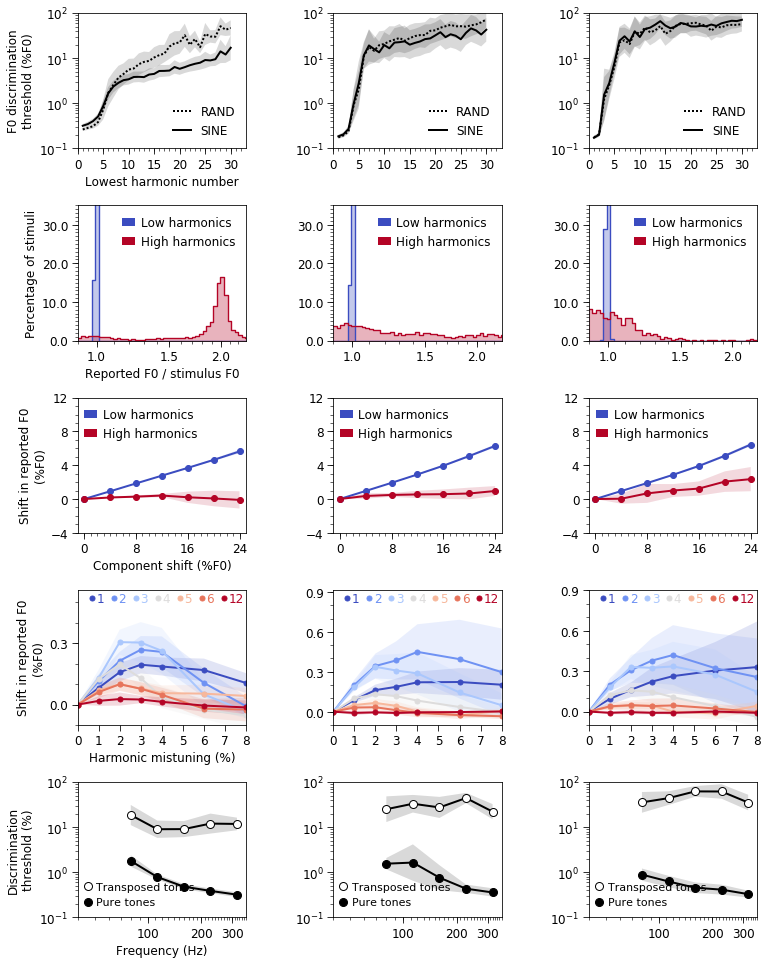

In [18]:
importlib.reload(util_figures)
importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)

experiment_to_plot_fcn_map = {
    'bernox2005': util_figures_psychophysics.make_bernox_threshold_plot,
    'transposedtones': util_figures_psychophysics.make_TT_threshold_plot,
    'freqshiftedcomplexes': util_figures_psychophysics.make_freqshiftedcomplexes_plot,
    'mistunedharmonics': util_figures_psychophysics.make_mistuned_harmonics_line_plot,
    'altphasecomplexes': util_figures_psychophysics.make_altphase_histogram_plot,
}

experiment_keys = [
    'bernox2005',
    'altphasecomplexes',
    'freqshiftedcomplexes',
    'mistunedharmonics',
    'transposedtones',
]

NROWS = len(experiment_keys)
NCOLS = len(list_dict_results_dicts)
figsize = (4*NCOLS*0.9, 3*NROWS*0.9)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)
ax = np.array(ax).reshape([NROWS, NCOLS])

for c_idx, (dict_results_dicts, list_model_dir) in enumerate(zip(list_dict_results_dicts, list_list_model_dir)):
    for r_idx, key in enumerate(experiment_keys):
        results_dict_input = dict_results_dicts[key]
        plot_fcn = experiment_to_plot_fcn_map[key]
        # Specify kwargs for all psychophysics subplots
        kwargs = {
            'include_yerr': True,
        }
        # Modify kwargs for special cases
        if (isinstance(list_model_dir, str)) and (list_model_dir == 'HUMAN'):
            kwargs['include_yerr'] = False
        plot_fcn(ax[r_idx, c_idx], results_dict_input, **kwargs)
        if c_idx > 0:
            ax[r_idx, c_idx].xaxis.label.set_color('w')
            ax[r_idx, c_idx].yaxis.label.set_color('w')

plt.tight_layout()
plt.show()

# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_arch_search_v02_top10archs_individually.pdf'
# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_manipulation_IHClowpass.pdf'
# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_manipulation_cochFilterBWs.pdf'
# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_manipulation_spont_rate.pdf'
# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_manipulation_flat_exc_mean_test.pdf'
# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_manipulation_sound_statistics_training_stimuli.pdf'
# fn_save = 'figures/archive_2021_05_07_pitchnet_paper_figures_v04/psychophysics_all_manipulation_sound_statistics_SNR.pdf'

# fig.savefig(fn_save, bbox_inches='tight', pad_inches=0)


In [ ]:
# for r in range(ax.shape[0]):
#     for c in range(ax.shape[1]):
#         bbox_inches = ax[r, c].get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
#         save_fn = os.path.join(save_dir, 'panel_{}{}.pdf'.format(r, c))
#         fig.savefig(save_fn, bbox_inches=bbox_inches, pad_inches=0)


In [ ]:
### GENERIC PARAMETERS
figsize=(4,3)
poster_plot_kwargs = {
    'fontsize_labels': 16,
    'fontsize_legend': 14,
    'fontsize_ticks': 14,
    'include_yerr': True,
    'kwargs_bootstrap': {
        'bootstrap_repeats': 1000,
        'metric_function': 'median',
    },
}

### Build dictionary of human results_dict for each experiment
experiment_to_human_results_map = {
    'bernox2005': util_human_model_comparison.get_human_results_dict_bernox2005(),
    'transposedtones': util_human_model_comparison.get_human_results_dict_transposedtones(),
    'freqshiftedcomplexes': util_human_model_comparison.get_human_results_dict_freqshiftedcomplexes(),
    'mistunedharmonics': util_human_model_comparison.get_human_results_dict_mistunedharmonics(),
    'altphasecomplexes': util_human_model_comparison.get_human_results_dict_altphasecomplexes(),
}


In [ ]:
import sys
import os
import json
import numpy as np
import glob
import copy
import importlib
%matplotlib inline
import matplotlib.pyplot as plt

import util_human_model_comparison
import util_figures_psychophysics
importlib.reload(util_figures_psychophysics)

sys.path.append('/packages/msutil')
import util_figures


### SPECIFY THE OUTERMOST DIRECTORY CONTAINING ALL MODELS
model_dir = '/om2/user/msaddler/pitchnet/saved_models/'

### SPECIFY RESULTS DICT BASENAME: determines which experiment to plot
# results_dict_basename = 'EVAL_SOFTMAX_bernox2005_FixedFilter_bestckpt_results_dict.json'
results_dict_basename = 'EVAL_SOFTMAX_lowharm_v01_bestckpt_results_dict.json'

### SPECIFY REGULAR EXPRESSIONS FOR MODELS: (regex, model_name) pairs
master_list = [
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species004_spont070_BWlinear_IHC3000Hz_IHC7order/arch_0???/', 'Linearly spaced'),
# #     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW02eN1_IHC3000Hz_IHC7order/arch_0???/', '4x narrower BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_0???/', '2x narrower BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', 'Human filter BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_0???/', '2x broader BWs'),
# #     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW40eN1_IHC3000Hz_IHC7order/arch_0???/', '4x broader BWs'),
    
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_0191_seed*/', '2x narrower BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0191_seed*/', 'Human filter BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_0191_seed*/', '2x broader BWs'),
    
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', 'Natural'),
#     ('/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_neg10pos10_filter_signalLPv01/arch_0???/', 'Lowpass'),
#     ('/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_neg10pos10_filter_signalHPv00/arch_0???/', 'Highpass'),
#     ('/saved_models/arch_search_v02_topN/PND_mfcc_PNDv08PYSmatched12_TLASmatched12_snr_neg10pos10_phase3/arch_0???/', 'Matched'),
#     ('/saved_models/arch_search_v02_topN/PND_mfcc_PNDv08PYSnegated12_TLASmatched12_snr_neg10pos10_phase3/arch_0???/', 'Anti-matched'),
#     ('/saved_models/arch_search_v02_topN/PND_v08spch_noise_TLAS_snr_neg10pos10/arch_0???/', 'Speech only'),
#     ('/saved_models/arch_search_v02_topN/PND_v08inst_noise_TLAS_snr_neg10pos10/arch_0???/', 'Music only'),
#     ('/saved_models/arch_search_v02_topN/PND_v08_noise_TLAS_snr_posInf/arch_0???/EVAL_SOFTMAX_lowharm_v04_bestckpt_results_dict.json', 'Speech + music (natural)\nwith no background noise'),
#     ('/saved_models/arch_search_v02_topN/cochlearn_PND_v08spch_noise_TLAS_snr_neg10pos10/arch_0???/', 'Speech only'),
#     ('/saved_models/arch_search_v02_topN/cochlearn_PND_v08inst_noise_TLAS_snr_neg10pos10/arch_0???/', 'Music only'),
    ('/saved_models/arch_search_v02_topN/cochlearn_IHC4000Hz_PND_v08spch_noise_TLAS_snr_neg10pos10/arch_0???/', 'Speech only'),
    ('/saved_models/arch_search_v02_topN/cochlearn_IHC4000Hz_PND_v08inst_noise_TLAS_snr_neg10pos10/arch_0???/', 'Music only'),

    
#     ('/saved_models/arch_search_v02_topN/f0_label_024/arch_0???/', '1/2 st'),
#     ('/saved_models/arch_search_v02_topN/f0_label_048/arch_0???/', '1/4 st'),
#     ('/saved_models/arch_search_v02_topN/f0_label_096/arch_0???/', '1/8 st'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', '1/16 st'),
#     ('/saved_models/arch_search_v02_topN/f0_label_384/arch_0???/', '1/32 st'),
    
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '100 ANF'),
#     ('/saved_models/arch_search_v02_topN/REDOsr2000_cfI100_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '100$^T$ ANF'),
#     ('/saved_models/arch_search_v02_topN/REDOsr2000_cfI250_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '250$^T$ ANF'),
#     ('/saved_models/arch_search_v02_topN/REDOsr2000_cfI500_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '500$^T$ ANF'),
#     ('/saved_models/arch_search_v02_topN/REDOsr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '1000$^T$ ANF'),

#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_0???/', '2x narrower BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', 'Human filter BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_0???/', '2x broader BWs'),

#     ('/saved_models/arch_search_v02_topN/REDOsr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '50Hz'),
# #     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '50Hz'),
# #     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0250Hz_IHC7order/arch_0???/', '250Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0320Hz_IHC7order/arch_0???/', '320Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC1000Hz_IHC7order/arch_0???/', '1000Hz'),
# #     ('HUMAN', 'Humans'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', '3000Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC6000Hz_IHC7order/arch_0???/', '6000Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC9000Hz_IHC7order/arch_0???/', '9000Hz'),

#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_bestckpt_results_dict.json', 'train NH + test NH'),
# #     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_dbspl85_bestckpt_results_dict.json', 'train NH + test NH (85dB)'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_cohc0_lowharm_v01_bestckpt_results_dict.json', 'train NH + test HI'),
# #     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_cohc0_lowharm_v01_dbspl85_bestckpt_results_dict.json', 'train NH + test HI (85dB)'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order_cohc0_dBSPL60to90/arch_0???/EVAL_SOFTMAX_cohc0_lowharm_v01_bestckpt_results_dict.json', 'train HI + test HI'),
# #     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order_cohc0_dBSPL60to90/arch_0???/EVAL_SOFTMAX_cohc0_lowharm_v01_dbspl85_bestckpt_results_dict.json', 'train HI + test HI (85dB)'),

#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_0???/', '2x narrower BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', 'Human filter BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_0???/', '2x broader BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_BW05eN1_lowharm_v01_bestckpt_results_dict.json', '2x narrower BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_bestckpt_results_dict.json', 'Human filter BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_BW20eN1_lowharm_v01_bestckpt_results_dict.json', '2x broader BWs'),
    
#     ('HUMAN', 'Humans'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_bestckpt_results_dict.json', 'Model'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_thresh40_bestckpt_results_dict.json', 'Model (thresh40)'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_noise08_bestckpt_results_dict.json', 'Model (noise08)'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/EVAL_SOFTMAX_lowharm_v01_noise10_bestckpt_results_dict.json', 'Model (noise10)'),
]

### LOAD PSYCHOPHYSICS EXPERIMENT RESULTS
model_keys = []
results_dicts = {}
master_count = 0
for fn_regex, model_key in master_list:
    results_dicts[model_key] = []
    model_keys.append(model_key)
    if fn_regex.upper() == 'HUMAN':
        results_dicts[model_key].append(util_human_model_comparison.get_human_results_dict_bernox2005())
    else:
        if not fn_regex[0] == '/': fn_regex = os.path.join(model_dir, fn_regex)
        if '.json' not in fn_regex: fn_regex = os.path.join(fn_regex, results_dict_basename)
        for results_dict_fn in sorted(glob.glob(fn_regex)):
            master_count = master_count + 1
            with open(results_dict_fn) as f:
                results_dicts[model_key].append(json.load(f))

print('Loaded results from {} files ({})'.format(master_count, results_dict_basename))
for key in results_dicts.keys():
    print(key, len(results_dicts[key]))


In [ ]:
### bernox2005 discrimination threholds

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_bernox2005()


legend_loc = 'lower right'
add_lines = False
save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2021_05_07_pitchnet_paper_figures_v04/'
if 'noise' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR FILTERING SOUNDS
    color_list = [color_list[idx] for idx in [0, 2, 4]]
    legend_loc = 'lower right'
    save_fn = 'tmp.pdf'
elif 'natural' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR FILTERING SOUNDS
    color_list = [color_list[idx] for idx in [0, 2, 4]]
    legend_loc = 'upper right'
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_natural.pdf')
elif 'matched' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR SYNTHETIC TONES
    color_list = [color_list[idx] for idx in [0, 4]]
    legend_loc = 'upper right'
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_synthetic.pdf')
elif 'only' in model_keys[0].lower():
    color_list = util_figures.get_color_list(8, cmap_name='Accent') # CMAP FOR SPEECH VS MUSIC
    color_list = [color_list[idx] for idx in [4,5]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_speech_vs_music.pdf')
    if 'cochlearn_IHC4000Hz' in master_list[0][0]:
        save_fn = save_fn.replace('.pdf', '_cochlearn_IHC4000Hz.pdf')
    elif 'cochlearn' in master_list[0][0]:
        save_fn = save_fn.replace('.pdf', '_cochlearn.pdf')
elif 'BW' in model_keys[1].upper():
    color_list = ['#5ab4ac', 'k', '#a6611a'] # CMAP FOR COCH FILTER BW
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs.pdf')
elif 'hz' in model_keys[0].lower():
    color_list = ['#fdb863', '#e08214', '#b35806', 'k', '#8073ac', '#b2abd2'] #  CMAP FOR IHC LOWPASS
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHClowpass.pdf')
elif '/' in model_keys[0]:
    color_list = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'] # CMAP for F0 bin width
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_f0_bin_width.pdf')
elif 'ANF' in model_keys[0]:
    color_list = ['#bdd7e7', '#6baed6', '#3182bd', '#08519c'] # CMAP for number of ANFs
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHC0050Hz_num_ANFs.pdf')
else:
    raise ValueError("Failed to automatically specify color_list and save_fn!!!")

color_list = color_list + ['b']

kwargs = {
    'xlimits': [0,31],
    'include_yerr': True,
    'legend_on': True,
    'restrict_conditions': [0],
}
kwargs['kwargs_legend'] = {
    'loc': legend_loc,
    'ncol': 2,
    'frameon': False,
    'framealpha': 1.0,
    'facecolor': 'w',
    'edgecolor': 'k',
    'handlelength': 0.5,
    'markerscale': 0.0,
    'fontsize': 10.0,
    'borderpad': 0.6,
    'borderaxespad': 0.3,
}
if len(model_keys) < 4:
    kwargs['kwargs_legend']['ncol'] = 1
    kwargs['kwargs_legend']['frameon'] = True

NROWS = 1
NCOLS = 1
# figsize = (4*NCOLS*.9, 3*NROWS*.9)
figsize = (4, 3)
gridspec_kw = {}
fig, ax = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw)


### PLOT MODEL ###
zorder = 0
for cidx, key in enumerate(model_keys):
    kwargs['sine_plot_kwargs'] = {
        'label': key,
        'color': color_list[cidx],
        'lw': 3,
        'zorder': zorder,
    }
    kwargs['rand_plot_kwargs'] = {
        'label': None,
        'color': color_list[cidx],
        'lw': 3,
        'zorder': zorder,
    }
#     for rd in results_dicts[key]:
#         plot_fcn(ax, rd, **kwargs)

    rd_itr0 = plot_fcn(ax, results_dicts[key], **kwargs)
    zorder -= 1

import matplotlib
leg = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        legobj.set_linewidth(6.0)

plt.tight_layout()
plt.show()

# print(save_fn)
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
### bernox2005 discrimination threholds

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_bernox2005()


save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_09_26_pitchnet_paper_figures_v03/'
if 'natural' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR FILTERING SOUNDS
    color_list = [color_list[idx] for idx in [0, 2, 4]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_natural.pdf')
elif 'matched' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR SYNTHETIC TONES
    color_list = [color_list[idx] for idx in [0, 4]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_synthetic.pdf')
elif 'only' in model_keys[0].lower():
    color_list = util_figures.get_color_list(8, cmap_name='Accent') # CMAP FOR SPEECH VS MUSIC
    color_list = [color_list[idx] for idx in [4,5]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_speech_vs_music.pdf')
elif 'BW' in model_keys[1].upper():
#     color_list = ['#5ab4ac', 'k', '#a6611a'] # CMAP FOR COCH FILTER BW
#     save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs.pdf')
    color_list = ['#f768a1', '#5ab4ac', 'k', '#a6611a'] # CMAP FOR COCH FILTER BW
    if len(model_keys) < 4:
        color_list = color_list[1:]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs_linear.pdf')
elif 'hz' in model_keys[0].lower():
    color_list = ['#fdb863', '#e08214', '#b35806', 'k', '#8073ac', '#b2abd2'] #  CMAP FOR IHC LOWPASS
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHClowpass.pdf')
elif '/' in model_keys[0]:
    color_list = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'] # CMAP for F0 bin width
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_f0_bin_width.pdf')
elif 'ANF' in model_keys[0]:
    color_list = ['#bdd7e7', '#6baed6', '#3182bd', '#08519c'] # CMAP for number of ANFs
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHC0050Hz_num_ANFs.pdf')
elif 'train NH' in model_keys[0]:
    color_list = util_figures.get_color_list(12, cmap_name='Paired')
    save_fn = None
else:
    color_list = util_figures.get_color_list(9, cmap_name='Set1')
    save_fn = None
#     raise ValueError("Failed to automatically specify color_list and save_fn!!!")

color_list = color_list + ['b']


def get_transition_point(results_dict_input, phase_mode=0, transition_f0dl=1.0,):
    '''
    '''
    if not isinstance(results_dict_input, list):
        results_dict_input = [results_dict_input]
    
    f0dls = np.array([rd['f0dl'] for rd in results_dict_input])
    list_phase_mode = np.array(results_dict_input[0]['phase_mode'])
    list_low_harm = np.array(results_dict_input[0]['low_harm'])
    
    f0dls = f0dls[:, list_phase_mode == phase_mode]
    list_low_harm = list_low_harm[list_phase_mode == phase_mode]
    list_phase_mode = list_phase_mode[list_phase_mode == phase_mode]
    
    list_transition = np.zeros([f0dls.shape[0]])
    for itr0 in range(f0dls.shape[0]):
        list_transition[itr0] = list_low_harm[f0dls[itr0, :] > transition_f0dl][0]
    transition_mean, transition_err = util_figures_psychophysics.bootstrap(list_transition)
    return transition_mean, transition_err, list_transition


fontsize_labels=12
fontsize_ticks=12
xlimits=[0, 31]
ylimits=[1e-1, 1e2]
kwargs = {
    'xlimits': xlimits,
    'ylimits': ylimits,
    'include_yerr': True,
    'legend_on': True,
    'restrict_conditions': [0],
    'kwargs_legend': {
#         'ncol': 2,
        'handlelength': 0.5,
        'borderpad': 0,
        'columnspacing': 1,
        'loc': 'lower right',
        'handletextpad': 0.5,
        'ncol': 1,
#         'fontsize': 8,
    },
#     'kwargs_bootstrap':{'bootstrap_repeats': 1000, 'metric_function': 'median'},
}
if len(model_keys) <= 4:
    kwargs['kwargs_legend']['ncol'] = 1

NROWS = 2
NCOLS = 2
wratio = 6.5
hratio = 6.5 * 3.6/4
figsize = (4 * (wratio + 1) / wratio, 3 * (hratio + 1) / hratio)
gridspec_kw = {
    'width_ratios': [1, wratio],
    'height_ratios': [hratio, 1],
    'wspace': 0.0,
    'hspace': 0.0,
}
fig, ax_arr = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw, sharex='col', sharey='row')

### PLOT MODEL ###
zorder = 0
cidx = 0
for itr0, key in enumerate(model_keys):
    kwargs['sine_plot_kwargs'] = {
        'label': key,
        'color': color_list[cidx],
        'lw': 3,
        'zorder': zorder,
    }
    kwargs['rand_plot_kwargs'] = {
        'label': None,
        'color': color_list[cidx],
        'lw': 3,
        'zorder': zorder,
    }
    if False:#'HUMAN' in key.upper():
        kwargs['sine_plot_kwargs'] = {
            'color': [0, 0, 0],
            'label': None,
            'lw': 1,
            'ls': '--',
            'zorder': 1000,
            'marker': 'o',
            'ms': 6,
            'markerfacecolor': [1, 1, 1],
            'markeredgecolor': [0, 0, 0],
            'markeredgewidth': 1,
        }
    
    rd_itr0 = plot_fcn(ax_arr[0, 1], results_dicts[key], **kwargs)
    
    if True:#'HUMAN' not in key.upper():
        transition_mean, transition_err, list_transition = get_transition_point(results_dicts[key])
        threshold_mask = np.logical_and(np.array(rd_itr0['phase_mode']) == 0,
                                        np.array(rd_itr0['low_harm']) == 1)
        log10_f0dl = rd_itr0['log10_f0dl'][threshold_mask][0]
        log10_f0dl_err = rd_itr0['log10_f0dl_err'][threshold_mask][0]

        line_plot_kwargs = {
            'lw': 0.50,
            'ls': '--',
            'dashes': (2, 2),
            'color': color_list[cidx],
            'zorder': zorder,
        }
        line_ymin = 1e-1
        line_ymax = np.power(10.0, np.interp(transition_mean, rd_itr0['low_harm'], rd_itr0['log10_f0dl']))
        ax_arr[0, 1].plot([transition_mean, transition_mean],
                          [line_ymin, line_ymax],
                          **line_plot_kwargs)
        errorbar_kwargs = {
            'fmt': 's',
            'color': color_list[cidx],
            'ms': 2,
            'ecolor': color_list[cidx],
            'elinewidth': 3,
            'capsize': 0,
            'capthick': 0,
        }
        yerr = np.array([
            np.power(10.0, log10_f0dl) - np.power(10.0, log10_f0dl-2*log10_f0dl_err),
            np.power(10.0, log10_f0dl+2*log10_f0dl_err) - np.power(10.0, log10_f0dl)
        ]).reshape([2, -1])
        ax_arr[0, 0].errorbar(itr0, np.power(10.0, log10_f0dl), xerr=None, yerr=yerr, **errorbar_kwargs)
        ax_arr[1, 1].errorbar(transition_mean, len(model_keys)-itr0-1, xerr=2*transition_err, yerr=None, **errorbar_kwargs)
        ax_arr[1, 1].plot([transition_mean, transition_mean],
                          [len(model_keys)-itr0-1, 100],
                          **line_plot_kwargs)
        cidx += 1
    zorder -= 1
    

import matplotlib
leg = [c for c in ax_arr[0, 1].get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        if False:#'human' in str(legobj).lower():
            legobj.set_linewidth(1.0)
            legobj._legmarker.set_markersize(6)
        else:
            legobj.set_linewidth(6.0)

ax_arr[0, 1].set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
ax_arr[0, 1].tick_params(which='both', length=0)

util_figures.format_axes(ax_arr[0, 0],
                         str_xlabel=None,
                         str_ylabel='F0 discrimination\nthreshold (%F0)',
                         fontsize_labels=fontsize_labels,
                         fontsize_ticks=fontsize_ticks,
                         fontweight_labels=None,
                         xscale='linear',
                         yscale='log',
                         xlimits=[-1, itr0+1],
                         ylimits=ylimits,
                         xticks=[],
                         yticks=None,
                         xticks_minor=[],
                         yticks_minor=None,
                         xticklabels=[],
                         yticklabels=None,
                         spines_to_hide=[],
                         major_tick_params_kwargs_update={},
                         minor_tick_params_kwargs_update={})
util_figures.format_axes(ax_arr[1, 1],
                         str_xlabel='Lowest harmonic number',
                         str_ylabel=None,
                         fontsize_labels=fontsize_labels,
                         fontsize_ticks=fontsize_ticks,
                         fontweight_labels=None,
                         xscale='linear',
                         yscale='linear',
                         xlimits=xlimits,
                         ylimits=[-1, itr0+1],
                         xticks=np.arange(xlimits[0], xlimits[1], 5),
                         yticks=[],
                         xticks_minor=np.arange(xlimits[0], xlimits[1], 1),
                         yticks_minor=None,
                         xticklabels=None,
                         yticklabels=None,
                         spines_to_hide=[],
                         major_tick_params_kwargs_update={},
                         minor_tick_params_kwargs_update={})

ax_arr[0, 0].text(np.mean([-1, itr0+1]), 1.8, 'Best thresholds', {'ha': 'center', 'va': 'bottom'}, rotation=90, fontsize=11)
ax_arr[1, 1].text(9, np.mean([-1, itr0+1]), 'Transition points', {'ha': 'left', 'va': 'center'}, rotation=0, fontsize=11)

ax_arr[1, 0].axis('off')

plt.tight_layout()
plt.show()

print(save_fn)
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)

fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
### bernox2005 discrimination threholds

importlib.reload(util_figures_psychophysics)
importlib.reload(util_human_model_comparison)
plot_fcn = util_figures_psychophysics.make_bernox_threshold_plot
human_rd = util_human_model_comparison.get_human_results_dict_bernox2005()


save_dir = '/om2/user/msaddler/pitchnet/assets_psychophysics/figures/archive_2020_09_26_pitchnet_paper_figures_v03/'
if 'natural' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR FILTERING SOUNDS
    color_list = [color_list[idx] for idx in [0, 2, 4]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_natural.pdf')
elif 'matched' in model_keys[0].lower():
    color_list = util_figures.get_color_list(6, cmap_name='gist_heat') # CMAP FOR SYNTHETIC TONES
    color_list = [color_list[idx] for idx in [0, 4]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_synthetic.pdf')
elif 'only' in model_keys[0].lower():
    color_list = util_figures.get_color_list(8, cmap_name='Accent') # CMAP FOR SPEECH VS MUSIC
    color_list = [color_list[idx] for idx in [4,5]]
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_sound_statistics_speech_vs_music.pdf')
elif 'BW' in model_keys[1].upper():
#     color_list = ['#5ab4ac', 'k', '#a6611a'] # CMAP FOR COCH FILTER BW
#     save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs.pdf')
    color_list = ['#f768a1', '#5ab4ac', 'k', '#a6611a'] # CMAP FOR COCH FILTER BW
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_cochFilterBWs_linear.pdf')
elif 'hz' in model_keys[0].lower():
    color_list = ['#fdb863', '#e08214', '#b35806', 'k', '#8073ac', '#b2abd2'] #  CMAP FOR IHC LOWPASS
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHClowpass.pdf')
elif '/' in model_keys[0]:
    color_list = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'] # CMAP for F0 bin width
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_f0_bin_width.pdf')
elif 'ANF' in model_keys[0]:
    color_list = ['#c6dbef', '#bdd7e7', '#6baed6', '#3182bd', '#08519c'] # CMAP for number of ANFs
    save_fn = os.path.join(save_dir, 'psychophysics_bernoxSinePhase_manipulation_IHC0050Hz_num_ANFs.pdf')
else:
    raise ValueError("Failed to automatically specify color_list and save_fn!!!")

color_list = color_list + ['b']


def get_transition_point(results_dict_input, phase_mode=0, transition_f0dl=1.0,):
    '''
    '''
    if not isinstance(results_dict_input, list):
        results_dict_input = [results_dict_input]
    
    f0dls = np.array([rd['f0dl'] for rd in results_dict_input])
    list_phase_mode = np.array(results_dict_input[0]['phase_mode'])
    list_low_harm = np.array(results_dict_input[0]['low_harm'])
    
    f0dls = f0dls[:, list_phase_mode == phase_mode]
    list_low_harm = list_low_harm[list_phase_mode == phase_mode]
    list_phase_mode = list_phase_mode[list_phase_mode == phase_mode]
    
    list_transition = np.zeros([f0dls.shape[0]])
    for itr0 in range(f0dls.shape[0]):
        list_transition[itr0] = list_low_harm[f0dls[itr0, :] > transition_f0dl][0]
    transition_mean, transition_err = util_figures_psychophysics.bootstrap(list_transition)
    return transition_mean, transition_err, list_transition


fontsize_labels=12
fontsize_ticks=12
xlimits=[0, 31]
ylimits=[1e-1, 1e2]
kwargs = {
    'xlimits': xlimits,
    'ylimits': ylimits,
    'include_yerr': True,
    'legend_on': True,
    'restrict_conditions': [0],
    'kwargs_legend': {
        'ncol': 2,
        'handlelength': 0.5,
        'borderpad': 0,
        'columnspacing': 1,
        'loc': 'lower right',
        'handletextpad': 0.5,
    },
}
if len(model_keys) <= 4:
    kwargs['kwargs_legend']['ncol'] = 1

NROWS = 1
NCOLS = 2
wratio = 6.5
figsize = (4 * (wratio + 1) / wratio, 3 * (wratio + 1/2) / wratio)
gridspec_kw = {
    'width_ratios': [1, wratio],
    'wspace': 0.0,
    'hspace': 0.0,
}
fig, ax_arr = plt.subplots(nrows=NROWS, ncols=NCOLS, figsize=figsize, gridspec_kw=gridspec_kw, sharex='col', sharey='row')
ax_arr = ax_arr.reshape([1, -1])

### PLOT MODEL ###
zorder = 0
cidx = 0
for itr0, key in enumerate(model_keys):
    kwargs['sine_plot_kwargs'] = {
        'label': key,
        'color': color_list[cidx],
        'lw': 3,
        'zorder': zorder,
    }
    kwargs['rand_plot_kwargs'] = {
        'label': None,
        'color': color_list[cidx],
        'lw': 3,
        'zorder': zorder,
    }
    if 'HUMAN' in key.upper():
        kwargs['sine_plot_kwargs'] = {
            'color': [0, 0, 0],
            'label': None,
            'lw': 1,
            'ls': '--',
            'zorder': 1000,
            'marker': 'o',
            'ms': 6,
            'markerfacecolor': [1, 1, 1],
            'markeredgecolor': [0, 0, 0],
            'markeredgewidth': 1,
        }
    
    rd_itr0 = plot_fcn(ax_arr[0, 1], results_dicts[key], **kwargs)
    
    if 'HUMAN' not in key.upper():
        transition_mean, transition_err, list_transition = get_transition_point(results_dicts[key])
        threshold_mask = np.logical_and(np.array(rd_itr0['phase_mode']) == 0,
                                        np.array(rd_itr0['low_harm']) == 1)
        log10_f0dl = rd_itr0['log10_f0dl'][threshold_mask][0]
        log10_f0dl_err = rd_itr0['log10_f0dl_err'][threshold_mask][0]

        line_plot_kwargs = {
            'lw': 0.50,
            'ls': '--',
            'dashes': (2, 2),
            'color': color_list[cidx],
            'zorder': zorder,
        }
        line_ymin = 1e-1
        line_ymax = np.power(10.0, np.interp(transition_mean, rd_itr0['low_harm'], rd_itr0['log10_f0dl']))
#         ax_arr[0, 1].plot([transition_mean, transition_mean],
#                           [line_ymin, line_ymax],
#                           **line_plot_kwargs)
        errorbar_kwargs = {
            'fmt': 's',
            'color': color_list[cidx],
            'ms': 2,
            'ecolor': color_list[cidx],
            'elinewidth': 3,
            'capsize': 0,
            'capthick': 0,
        }
        yerr = np.array([
            np.power(10.0, log10_f0dl) - np.power(10.0, log10_f0dl-2*log10_f0dl_err),
            np.power(10.0, log10_f0dl+2*log10_f0dl_err) - np.power(10.0, log10_f0dl)
        ]).reshape([2, -1])
        ax_arr[0, 0].errorbar(itr0, np.power(10.0, log10_f0dl), xerr=None, yerr=yerr, **errorbar_kwargs)
        cidx += 1
    zorder -= 1
    

import matplotlib
leg = [c for c in ax_arr[0, 1].get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        if 'human' in str(legobj).lower():
            legobj.set_linewidth(1.0)
            legobj._legmarker.set_markersize(6)
        else:
            legobj.set_linewidth(6.0)

ax_arr[0, 1].set(ylabel=None, yticklabels=[])
ax_arr[0, 1].tick_params(which='both', axis='y', length=0)

util_figures.format_axes(ax_arr[0, 0],
                         str_xlabel=None,
                         str_ylabel='F0 discrimination\nthreshold (%F0)',
                         fontsize_labels=fontsize_labels,
                         fontsize_ticks=fontsize_ticks,
                         fontweight_labels=None,
                         xscale='linear',
                         yscale='log',
                         xlimits=[-1, itr0+1],
                         ylimits=ylimits,
                         xticks=[],
                         yticks=None,
                         xticks_minor=[],
                         yticks_minor=None,
                         xticklabels=[],
                         yticklabels=None,
                         spines_to_hide=[],
                         major_tick_params_kwargs_update={},
                         minor_tick_params_kwargs_update={})

ax_arr[0, 0].text(np.mean([-1, itr0+1]), 1.8, 'Best thresholds', {'ha': 'center', 'va': 'bottom'}, rotation=90, fontsize=11)


plt.tight_layout()
plt.show()

# print(save_fn)
# fig.savefig(save_fn, bbox_inches='tight', pad_inches=0, transparent=False)

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
import sys
import os
import json
import numpy as np
import scipy.stats
import glob
import copy
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.cm
import matplotlib.colors

import f0dl_bernox
import f0dl_generalized
import util_human_model_comparison
import util_figures_psychophysics
import importlib
importlib.reload(f0dl_generalized)
importlib.reload(util_human_model_comparison)
importlib.reload(util_figures_psychophysics)

sys.path.append('/packages/msutil')
import util_figures


model_dir_list = [
#     ('/saved_models/arch_search_v02_topN/connear_IHC3000Hz/arch_0???/', 'CoNNear_IHC3000Hz'),
#     ('HUMAN', 'Human listeners\n(Wier et al., 1977)'),

#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW02eN1_IHC3000Hz_IHC7order/arch_0???/', '4x narrower BWs'),
    ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW05eN1_IHC3000Hz_IHC7order/arch_0???/', '2x narrower BWs'),
    ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', 'Human filter BWs'),
    ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW20eN1_IHC3000Hz_IHC7order/arch_0???/', '2x broader BWs'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW40eN1_IHC3000Hz_IHC7order/arch_0???/', '4x broader BWs'),

#     ('/saved_models/arch_search_v02_topN/REDOsr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '50Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0320Hz_IHC7order/arch_0???/', '320Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC1000Hz_IHC7order/arch_0???/', '1000Hz'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', '3000Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC6000Hz_IHC7order/arch_0???/', '6000Hz'),
#     ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC9000Hz_IHC7order/arch_0???/', '9000Hz'),
]

if 'BW0' in model_dir_list[0][0]:
    basename, key_xval = ('EVAL_SOFTMAX_testsnr_v02_bestckpt_results_dict.json', 'snr_per_component')
else:
    basename, key_xval = ('EVAL_SOFTMAX_testspl_v03_bestckpt_results_dict.json', 'dbspl')

list_model_name = []
list_list_results_dict = []
for (model_dir, model_name) in model_dir_list:
    if model_dir.upper() == 'HUMAN':
        list_results_dict = [util_human_model_comparison.get_human_results_dict_pure_tone_spl(threshold_level=0)]
        print(model_dir, len(list_results_dict))
    else:
        regex_json_fn = model_dir
        if '.json' not in regex_json_fn:
            regex_json_fn = os.path.join(regex_json_fn, basename)
        list_results_dict = []
        for fn_results_dict in sorted(glob.glob(regex_json_fn)):
            with open(fn_results_dict) as f:
                results_dict = json.load(f)
            list_results_dict.append(results_dict)
        print(regex_json_fn, len(list_results_dict))
    list_model_name.append(model_name)
    list_list_results_dict.append(list_results_dict)


In [ ]:
importlib.reload(util_figures_psychophysics)

if 'BW' in list_model_name[0]:
    color_list = ['#5ab4ac', 'k', '#a6611a'] # CMAP FOR COCH FILTER BW
else:
    color_list = ['#fdb863', '#e08214', '#b35806', 'k', '#8073ac', '#b2abd2'] #  CMAP FOR IHC LOWPASS

# color_list = np.array([[90,180,172], [0,0,0], [166,97,26]])/256 # CMAP FOR COCH FILTER BW

fig, ax = plt.subplots(figsize=(4, 3))
for cidx, (list_results_dict, model_name) in enumerate(zip(list_list_results_dict, list_model_name)):
    
    kwargs = {
        'key_xval': key_xval,
        'str_xlabel': 'Per component SNR (dB)',
#         'xlimits': [-23, -7],
        'xticks': 5,
        'xticks_minor': 1,
        'include_yerr': True,
        'plot_kwargs_update': {
            'color': color_list[cidx],
            'label': model_name,
            'lw': 3,
            'marker': '.',
            'markersize': 6,
        },
        'kwargs_legend': {
            'ncol': 1,
            'handlelength': 0.5,
            'borderpad': 0,
            'columnspacing': 1,
            'loc': 'upper right',
            'handletextpad':0.5,
        },
    }
    
    util_figures_psychophysics.make_f0dl_threshold_plot(ax, list_results_dict, **kwargs)

import matplotlib
leg = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        legobj.set_linewidth(6.0)

plt.tight_layout()
plt.show()

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
importlib.reload(util_figures_psychophysics)

color_list = np.array([[253,184,99], [224,130,20], [179,88,6], [0,0,0], [128,115,172], [178,171,210]])/256# CMAP FOR IHC LOWPASS

# fig, ax = plt.subplots(figsize=(4, 3))
# fig, ax = plt.subplots(figsize=(4.615384615384615, 3.5128205128205128))
fig, ax = plt.subplots(figsize=(3.5, 3.5128205128205128))
zorder = 0
cidx = 0
for (list_results_dict, model_name) in zip(list_list_results_dict, list_model_name):
    if len(list_results_dict) == 1:
        kwargs = {
            'key_xval': key_xval,
            'str_xlabel': 'Sensation level (dB SL)',
            'str_ylabel': 'Frequency discrimination\nthreshold (%)',
            'xlimits': [0, 105],
            'xticks': 20,
            'xticks_minor': 5,
            'include_yerr': True,
            'plot_kwargs_update': {
                'color': [0, 0, 0],
                'label': model_name,
                'lw': 1,
                'ls': '--',
                'zorder': 1000,
                'marker': 'o',
                'markersize': 6,
                'markerfacecolor': [1, 1, 1],
                'markeredgecolor': [0, 0, 0],
                'markeredgewidth': 1,
            },
            'kwargs_legend': {
                'ncol': 2,
                'handlelength': 3*0.5,
                'borderpad': 0.25,
                'columnspacing': 1,
                'loc': 'upper center',
                'handletextpad': 0.5,
            },
        }
    else:
        kwargs = {
            'key_xval': key_xval,
            'str_xlabel': 'Stimulus level (dB SPL)',
            'str_ylabel': 'Frequency discrimination\nthreshold (%)',
            'xlimits': [0, 105],
            'xticks': 20,
            'xticks_minor': 5,
            'include_yerr': True,
            'plot_kwargs_update': {
                'color': color_list[cidx],
                'label': model_name,
                'lw': 3,
                'zorder': zorder,
                'marker': '.',
                'markersize': 6,
            },
            'kwargs_legend': {
                'ncol': 2,
                'handlelength': 0.5,
                'borderpad': 0.25,
                'columnspacing': 1,
                'loc': 'upper center',
                'handletextpad': 0.5,
            },
        }
        cidx += 1
        zorder -= 1
    util_figures_psychophysics.make_f0dl_threshold_plot(ax, list_results_dict, **kwargs)
    

import matplotlib
leg = [c for c in ax.get_children() if isinstance(c, matplotlib.legend.Legend)]
if len(leg) == 1:
    for legobj in leg[0].legendHandles:
        if 'human' in str(legobj).lower():
            legobj.set_linewidth(1.0)
            legobj._legmarker.set_markersize(6)
        else:
            legobj.set_linewidth(6.0)

plt.tight_layout()
plt.show()

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)


In [ ]:
import sys
import os
import glob
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import util_figures_psychophysics
import f0dl_bernox

sys.path.append('/packages/msutil')
import util_figures
import util_misc

master_list = [
#     ('/saved_models/arch_search_v02_topN/f0_label_024/arch_0???/', '1/2'),
#     ('/saved_models/arch_search_v02_topN/f0_label_048/arch_0???/', '1/4'),
#     ('/saved_models/arch_search_v02_topN/f0_label_096/arch_0???/', '1/8'),
#     ('/saved_models/arch_search_v02_topN/sr20000_cf100_species002_spont070_BW10eN1_IHC3000Hz_IHC7order/arch_0???/', '1/16'),
#     ('/saved_models/arch_search_v02_topN/f0_label_384/arch_0???/', '1/32'),
    
    ('/saved_models/arch_search_v02_topN/REDOsr20000_cf100_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '100'),
    ('/saved_models/arch_search_v02_topN/REDOsr2000_cfI100_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '100$^T$'),
    ('/saved_models/arch_search_v02_topN/REDOsr2000_cfI250_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '250$^T$'),
    ('/saved_models/arch_search_v02_topN/REDOsr2000_cfI500_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '500$^T$'),
    ('/saved_models/arch_search_v02_topN/REDOsr2000_cf1000_species002_spont070_BW10eN1_IHC0050Hz_IHC7order/arch_0???/', '1000$^T$'),
]

results_dict_basename = 'EVAL_validation_bestckpt_results_dict.json'

if '/' in master_list[0][1]:
    str_xlabel = 'F0 bin width (semitones)'
    list_color = ['#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026']
else:
    str_xlabel = 'Number of simulated ANFs'
    list_color = ['#c6dbef', '#bdd7e7', '#6baed6', '#3182bd', '#08519c']

model_keys = []
results_dicts = {}
master_count = 0
for fn_regex, model_key in master_list:
    results_dicts[model_key] = []
    model_keys.append(model_key)
    if '.json' not in fn_regex:
        fn_regex = os.path.join(fn_regex, results_dict_basename)
    for results_dict_fn in sorted(glob.glob(fn_regex)):
        master_count = master_count + 1
        with open(results_dict_fn) as f:
            results_dicts[model_key].append(json.load(f))

print('Loaded results from {} files ({})'.format(master_count, results_dict_basename))
for key in results_dicts.keys():
    print(key, len(results_dicts[key]))
    
    
fig, ax = plt.subplots(figsize=(4, 3))

xticklabels = model_keys
for xval, key in enumerate(model_keys):
    list_rd = results_dicts[key]
    list_f0_pct_error_median = [rd['f0_pct_error_median'] for rd in list_rd]
    print(key, len(list_f0_pct_error_median), np.mean(list_f0_pct_error_median))
    yval, yerr = util_figures_psychophysics.bootstrap(np.array(list_f0_pct_error_median))
    bar_kwargs = {
        'yerr': 2*yerr,
        'color': list_color[xval],
        'capsize': 6,
        'ecolor': list_color[xval],
        'linewidth': 12,
        'capthick': 1,
    }    
    ax.errorbar(xval, yval, **bar_kwargs)
    
    point_xvals = np.linspace(xval-0.12, xval+0.12, len(list_f0_pct_error_median))
    ax.plot(point_xvals,
            list_f0_pct_error_median,
            color='k',
            ls='',
            marker='.',
            ms=3)

ax = util_figures.format_axes(ax,
                              str_xlabel=str_xlabel,
                              str_ylabel='Median F0 error for\nnatural sounds (%F0)',
                              xlimits=[-0.5, len(model_keys)-0.5],
                              xticks=np.arange(0, len(model_keys)),
                              xticks_minor=[],
                              xticklabels=model_keys,
                              yscale='log',
                              ylimits=[0.4, 20],
                              spines_to_hide=[])
plt.tight_layout()
plt.show()

# fig.savefig('tmp.pdf', bbox_inches='tight', pad_inches=0, transparent=False)
